# Cartpole random agent evaluation (test)

In [1]:
import gym
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("whitegrid")

In [2]:
env = gym.make("CartPole-v1")
# env = gym.wrappers.Monitor(env, "recording")
# Needs env.env.close()
num_episodes = 100
total_reward_all_episodes = []
total_steps_all_episodes = []
total_info_all_episodes = []


In [3]:
for _ in tqdm(range(num_episodes)):
    total_reward = 0.0
    total_steps = 0
    info = None
    obs = env.reset()

    while True:
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        total_reward += reward
        total_steps += 1
        if done:
            break

    # print(f"Episode done in {total_steps} steps, with total reward {total_reward}.")
    total_reward_all_episodes.append(total_reward)
    total_steps_all_episodes.append(total_steps)
    total_info_all_episodes.append(info)

env.close()

100%|██████████| 100/100 [00:00<00:00, 467.28it/s]


In [4]:
results_df = pd.DataFrame.from_dict({"total_steps": total_steps_all_episodes, "total_rewards": total_reward_all_episodes, "episode_info": total_info_all_episodes})
results_df["episode_id"] = results_df.index

results_df.head(5)


,total_steps,total_rewards,episode_info,episode_id
0,21,21.0,{},0
1,12,12.0,{},1
2,37,37.0,{},2
3,15,15.0,{},3
4,14,14.0,{},4


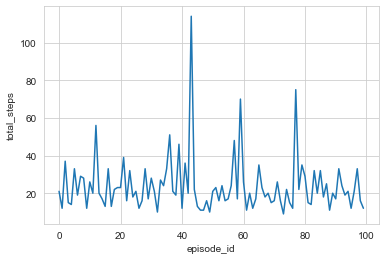

In [5]:
sns.lineplot(data=results_df, x="episode_id", y="total_steps");

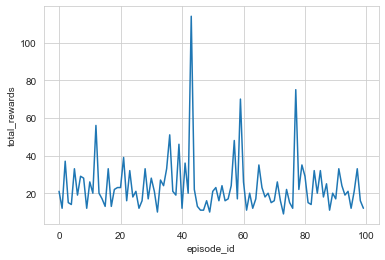

In [6]:
sns.lineplot(data=results_df, x="episode_id", y="total_rewards");

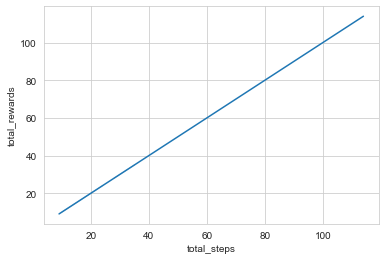

In [7]:
sns.lineplot(data=results_df, x="total_steps", y="total_rewards");